# Techniques vues en TP:

## 1) Reduction de dimension

### - Principal Component Analysis (PCA)

-> Quantitatif

-> Non supervisé

-> Maximiser la variance globale

### - Linear Discriminant Analysis (LDA)

-> Quantitatif

-> Supervisé

-> Maximiser la séparation entre classes (La LDA sert aussi pour la classification) La LDA sert si nos données sont étiquetées

### - Correspondent Analysis (CA)

-> Qualitatif

-> Non supervisé

-> Sert à analyser la relation entre deux variables

### - Multiple Correspondent Analysis (MCA)

-> Qualitatif

-> Non supervisé

-> Sert à analyser la relation entre plusieurs variables

### - Multiple Factorial Analysis (MFA)

-> Quantitatif + Qualitatif 

-> Non supervisé

-> Sert analyser l'effet de groupes (blocs) sur les individus

## 2) Reduction de dimension non linéaire

### - Kernel Principal Component Analysis (KPCA)

### - Non-negative matrix factorization (NMF)

### - Multidimensional scaling (MDS)

## 3) Clustering

### - K-means

### - Hierarchical Agglomerative Clustering (HAC)

### - Gaussian Mixture Models (GMM)

### - Stochastic Bloc Model (SBM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
marketing = pd.read_csv('marketing_campaign.csv',sep="\t")

In [3]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
marketing.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [6]:
marketing.fillna({'Income': marketing['Income'].median()}, inplace=True)

In [7]:
#On va faire quelques plots hehehehe

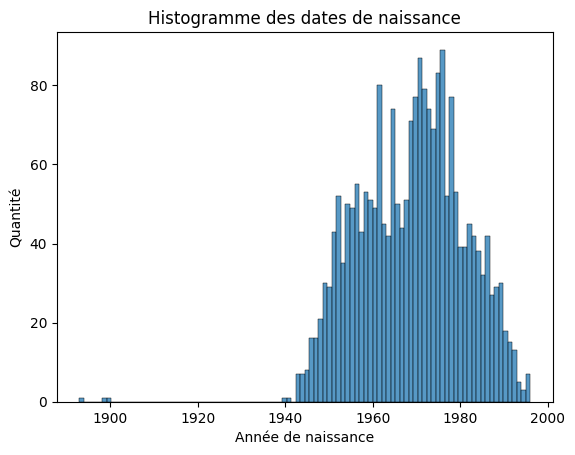

In [8]:
sns.histplot(marketing['Year_Birth'], bins = 100)
plt.title("Histogramme des dates de naissance")
plt.xlabel("Année de naissance")
plt.ylabel("Quantité")
plt.show()

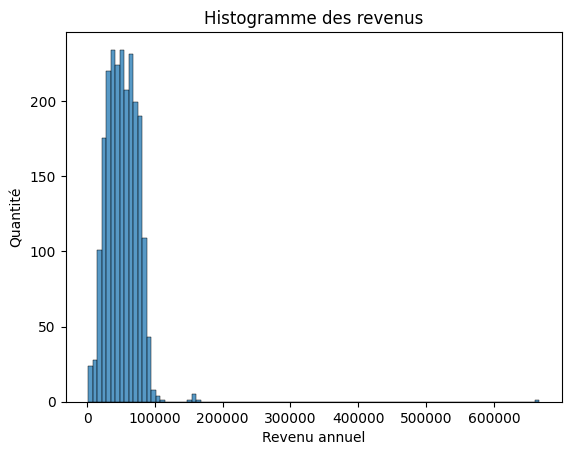

In [9]:
sns.histplot(marketing['Income'], bins = 100)
plt.title("Histogramme des revenus")
plt.xlabel("Revenu annuel")
plt.ylabel("Quantité")
plt.show()

In [10]:
riche = marketing.loc[marketing['Income']>600000, 'ID']
print(riche)

2233    9432
Name: ID, dtype: int64


In [11]:
marketing = marketing.drop(marketing[marketing['ID']==9432].index)

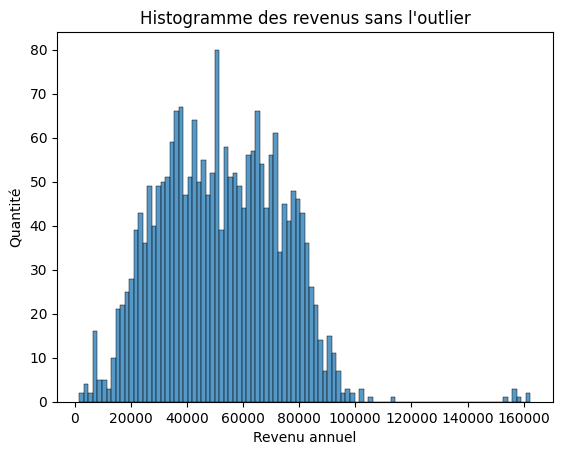

In [12]:
sns.histplot(marketing['Income'], bins = 100)
plt.title("Histogramme des revenus sans l'outlier")
plt.xlabel("Revenu annuel")
plt.ylabel("Quantité")
plt.show()

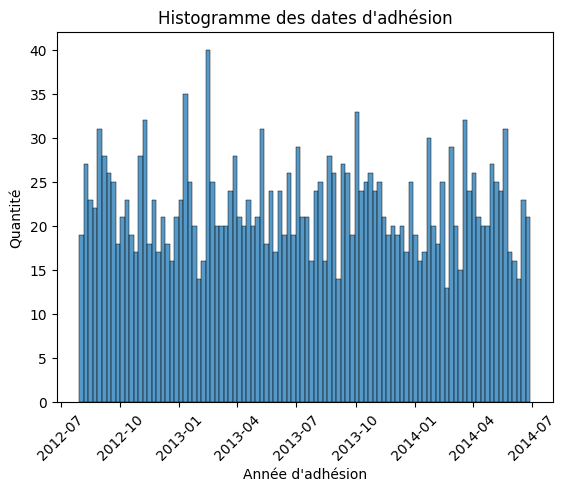

In [13]:
marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'], format='%d-%m-%Y')
sns.histplot(marketing['Dt_Customer'], bins = 100)
plt.title("Histogramme des dates d'adhésion")
plt.xlabel("Année d'adhésion")
plt.ylabel("Quantité")
plt.xticks(rotation=45)
plt.show()

In [14]:
# on tente une première réduction de dimension

In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [16]:
# On veut garder seulement les valeurs quantitatives
# On ne sélectionne que les colonnes contenant des valeurs numériques. select_dtypes permet de faire une sélection sur les colonnes 
# et include=[np.number] est l'argument qui permet de spécifier que l'on veut que des nombres.

marketing_numerique = marketing.select_dtypes(include=[np.number])

In [17]:
marketing_numerique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Income               2239 non-null   float64
 3   Kidhome              2239 non-null   int64  
 4   Teenhome             2239 non-null   int64  
 5   Recency              2239 non-null   int64  
 6   MntWines             2239 non-null   int64  
 7   MntFruits            2239 non-null   int64  
 8   MntMeatProducts      2239 non-null   int64  
 9   MntFishProducts      2239 non-null   int64  
 10  MntSweetProducts     2239 non-null   int64  
 11  MntGoldProds         2239 non-null   int64  
 12  NumDealsPurchases    2239 non-null   int64  
 13  NumWebPurchases      2239 non-null   int64  
 14  NumCatalogPurchases  2239 non-null   int64  
 15  NumStorePurchases    2239 non-null   int64 

In [18]:
# ici on enlève toutes les colonnes contenant des valeurs binaires, qui sont en fait des variables qualitatives. 
# on enlève aussi l'ID du client qui n'est pas une variable permettant de le classifier (à revoir car c'est aussi ce qui permet de l'identifier)

marketing_numerique = marketing_numerique.drop('AcceptedCmp1',axis=1)
marketing_numerique = marketing_numerique.drop('AcceptedCmp2',axis=1)
marketing_numerique = marketing_numerique.drop('AcceptedCmp3',axis=1)
marketing_numerique = marketing_numerique.drop('AcceptedCmp4',axis=1)
marketing_numerique = marketing_numerique.drop('AcceptedCmp5',axis=1)
marketing_numerique = marketing_numerique.drop('Complain',axis=1)
marketing_numerique = marketing_numerique.drop('Response',axis=1)
marketing_numerique = marketing_numerique.drop('ID',axis=1)

In [19]:
marketing_numerique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2239 non-null   int64  
 1   Income               2239 non-null   float64
 2   Kidhome              2239 non-null   int64  
 3   Teenhome             2239 non-null   int64  
 4   Recency              2239 non-null   int64  
 5   MntWines             2239 non-null   int64  
 6   MntFruits            2239 non-null   int64  
 7   MntMeatProducts      2239 non-null   int64  
 8   MntFishProducts      2239 non-null   int64  
 9   MntSweetProducts     2239 non-null   int64  
 10  MntGoldProds         2239 non-null   int64  
 11  NumDealsPurchases    2239 non-null   int64  
 12  NumWebPurchases      2239 non-null   int64  
 13  NumCatalogPurchases  2239 non-null   int64  
 14  NumStorePurchases    2239 non-null   int64  
 15  NumWebVisitsMonth    2239 non-null   int64 

In [20]:
# StandardScaler est une classe de la bibliothèque scikit-learn qui permet de normaliser (centrer réduire) les données

scaler = StandardScaler()

# On va donc centrer et réduire nos données marketing car sinon les revenus annuels biaisent trop l'analyse (entre 20 000 et 100 000 en valeur)

marketing_scaled = scaler.fit_transform(marketing_numerique)

[0.3900376  0.12162945 0.07746902 0.06275283 0.05163676 0.04790897
 0.03974314 0.03802395 0.02918183 0.02855826 0.02622311 0.02430991
 0.02190541 0.01583159 0.01423146 0.0105567 ]


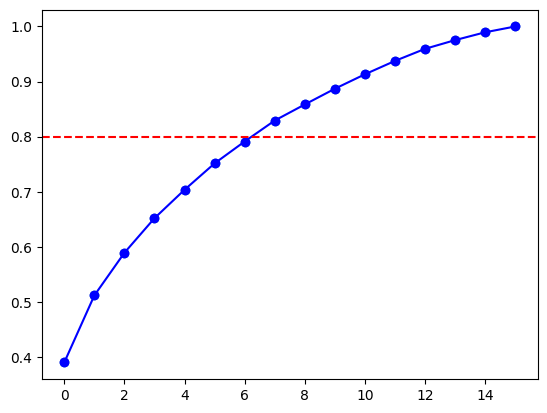

In [21]:
# PCA est une classe de la bibliothèque scikit-learn qui permet d'effectuer des ACP.

pca = PCA()

# Ici, on fait fit_transform : fit calcule les composantes principales et les valeurs propres de notre ACP
# transform applique la transformation, càd projete nos données dans cet espace de dimension réduite.

marketing_pca = pca.fit_transform(marketing_scaled)

# On print la part de variance de chaque axe (valeur propre de chaque axe)

print(pca.explained_variance_ratio_)

# On trace le graphique des variances cumulées, avec un trait à 80 % de variance expliquée

plt.scatter(np.arange(16),np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.arange(16),np.cumsum(pca.explained_variance_ratio_), color='blue', linestyle='-', marker='o')
plt.axhline(y=0.8, color='red', linestyle='--')
plt.show()

In [22]:
# Même méthode qu'avant, mais ici on met directement qu'on veut s'arrêter à 80 % de la variance

pca = PCA(0.8)
marketing_pca = pca.fit_transform(marketing_scaled)
print(pca.explained_variance_ratio_)

[0.3900376  0.12162945 0.07746902 0.06275283 0.05163676 0.04790897
 0.03974314 0.03802395]


In [23]:
# On peut essayer de classifier en utilisant un K-means

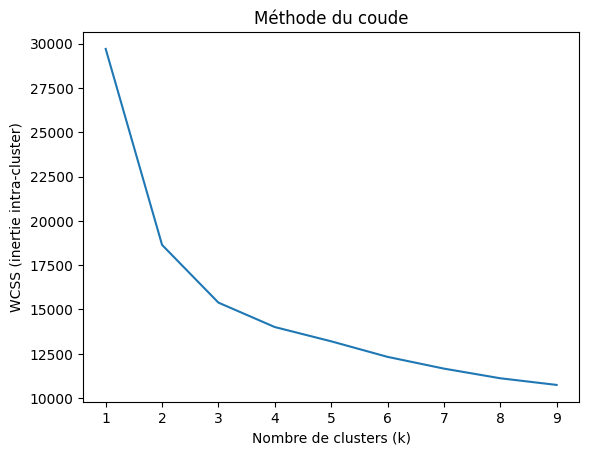

In [24]:
# On essaye la méthode du coude pour obtenir le nombre de clusters optimaux

wcss = []

# On teste pour différents nombres de clusters k

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(marketing_pca)
    wcss.append(kmeans.inertia_)

# On trace le graphique du coude

plt.plot(range(1, 10), wcss)
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("WCSS (inertie intra-cluster)")
plt.show()

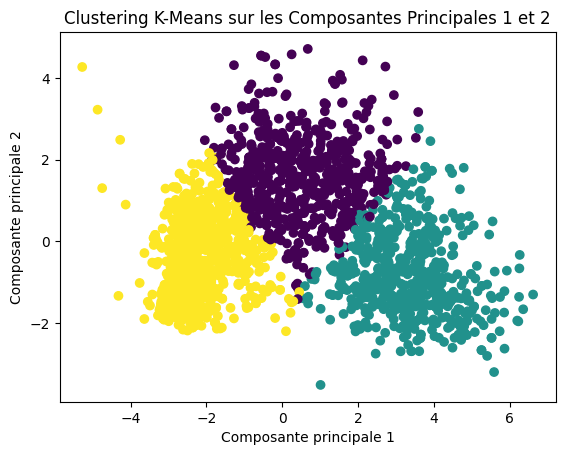

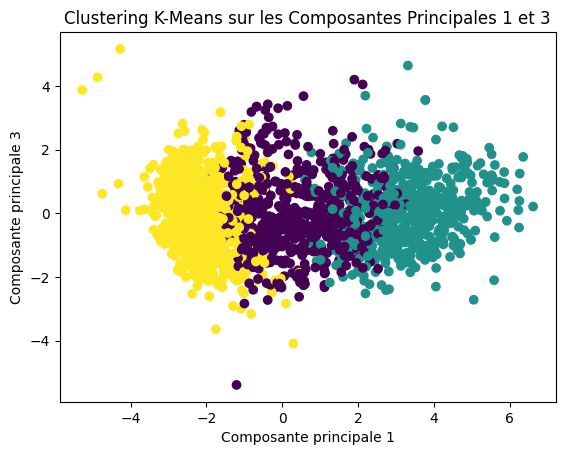

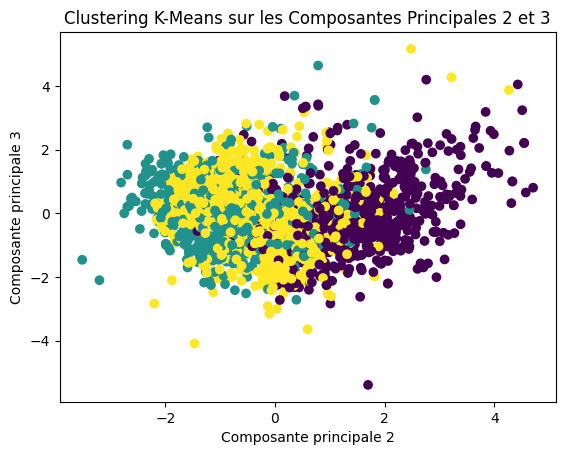

In [57]:
# On applique le K-Means sur nos données projetées dans l'espace de l'ACP (de dimension 3)

kmeans = KMeans(n_clusters=3, random_state=42)  # Choisir le nombre de clusters (ici 3)
clusters_k = kmeans.fit_predict(marketing_pca)  # Effectuer le clustering

plt.scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=clusters_k, cmap='viridis')
plt.title("Clustering K-Means sur les Composantes Principales 1 et 2")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

plt.scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=clusters_k, cmap='viridis')
plt.title("Clustering K-Means sur les Composantes Principales 1 et 3")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 3")
plt.show()

plt.scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=clusters_k, cmap='viridis')
plt.title("Clustering K-Means sur les Composantes Principales 2 et 3")
plt.xlabel("Composante principale 2")
plt.ylabel("Composante principale 3")
plt.show()

In [26]:
# On va tenter une classification en Hierarchical Agglomerative Clustering (HAC)

In [32]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

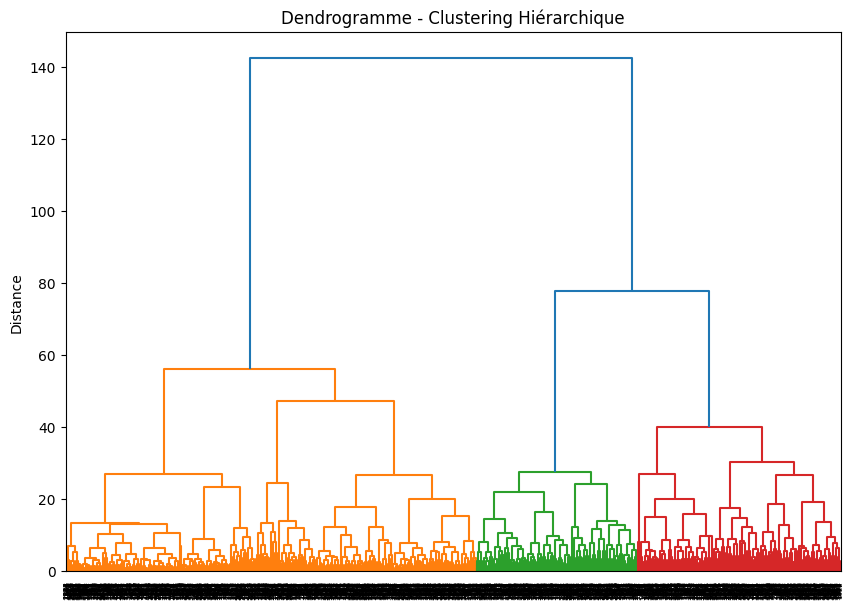

In [35]:
# On fait un dendogramme pour voir la construction des clusters de la méthode HAC
# Chaque point de donnée commence dans son propre cluster. Ainsi, si on a n points de données, on commence avec n clusters
# L'algorithme identifie les deux clusters les plus proches et les fusionne pour former un nouveau cluster
# Ce processus de fusion est basé sur la proximité entre les clusters, et il peut être mesuré de différentes manières que l'on verra après
# Après chaque fusion de deux clusters, le nombre total de clusters diminue de un 
# Ce processus est répété jusqu'à ce qu'il ne reste plus qu’un seul cluster ou jusqu'à ce que l’on décide d’arrêter à un nombre de clusters prédéfini

# La fonction linkage permet de créer un matrice de distances

Z = linkage(marketing_pca, method='ward')  # 'ward' est une des manières de calculer la proximité entre clusters

# On visualise le dendrogramme

plt.figure(figsize=(10, 7))
dendrogram(Z, color_threshold=60) # le paramètre color threshold nous permet de décider à quel hauter on coupe pour former des clusters
plt.title('Dendrogramme - Clustering Hiérarchique')
plt.ylabel('Distance')
plt.show()

In [29]:
# Le dendogramme se construit donc de bas en haut. La hauteur à laquelle se fait une fusion indique la similitude entre les deux
# clusters fusionnés. Autrement dit, plus la fusion est haute, moins les deux clusters fusionnés se ressemblent
# C'est à nous de déterminer ensuite quel est le nombre de clusters optimal, en équilibrant entre nombre de clusters et homogénéité des clusters
# On tire un trait horizontal pour déterminer le nombre de clusters

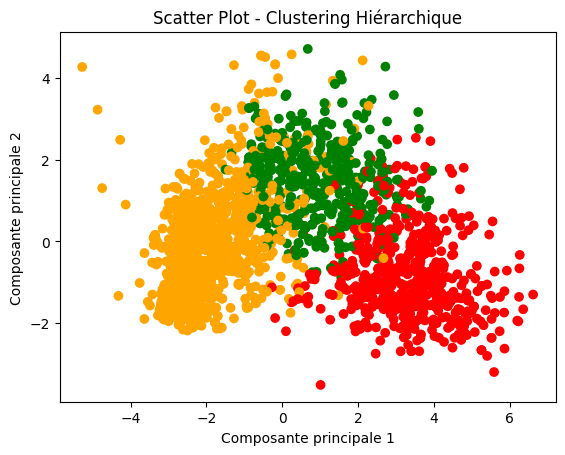

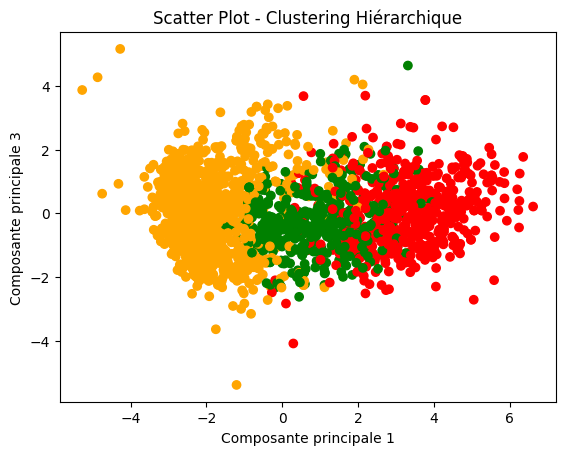

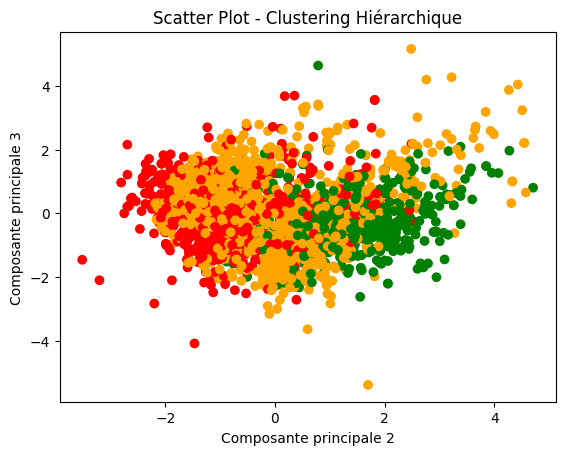

In [61]:
# Permet d'attribuer le label de son cluster à chaque point: a chaque individu est assigné 1, 2 ou 3.

clusters_h = fcluster(Z, t=3, criterion='maxclust') # criterion = maxclust permet de spécifier qu'on veut un nombre precis de clusters

# On trace un scatter plot avec les couleurs des clusters

colors = ['orange', 'green', 'red']

plt.scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=[colors[i-1] for i in clusters_h])
plt.title('Scatter Plot - Clustering Hiérarchique')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

plt.scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=[colors[i-1] for i in clusters_h])
plt.title('Scatter Plot - Clustering Hiérarchique')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 3')
plt.show()

plt.scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=[colors[i-1] for i in clusters_h])
plt.title('Scatter Plot - Clustering Hiérarchique')
plt.xlabel('Composante principale 2')
plt.ylabel('Composante principale 3')
plt.show()

In [50]:
# Note: on aurait pu aussi effectuer le HAC avec la classe hac de scikit-learn

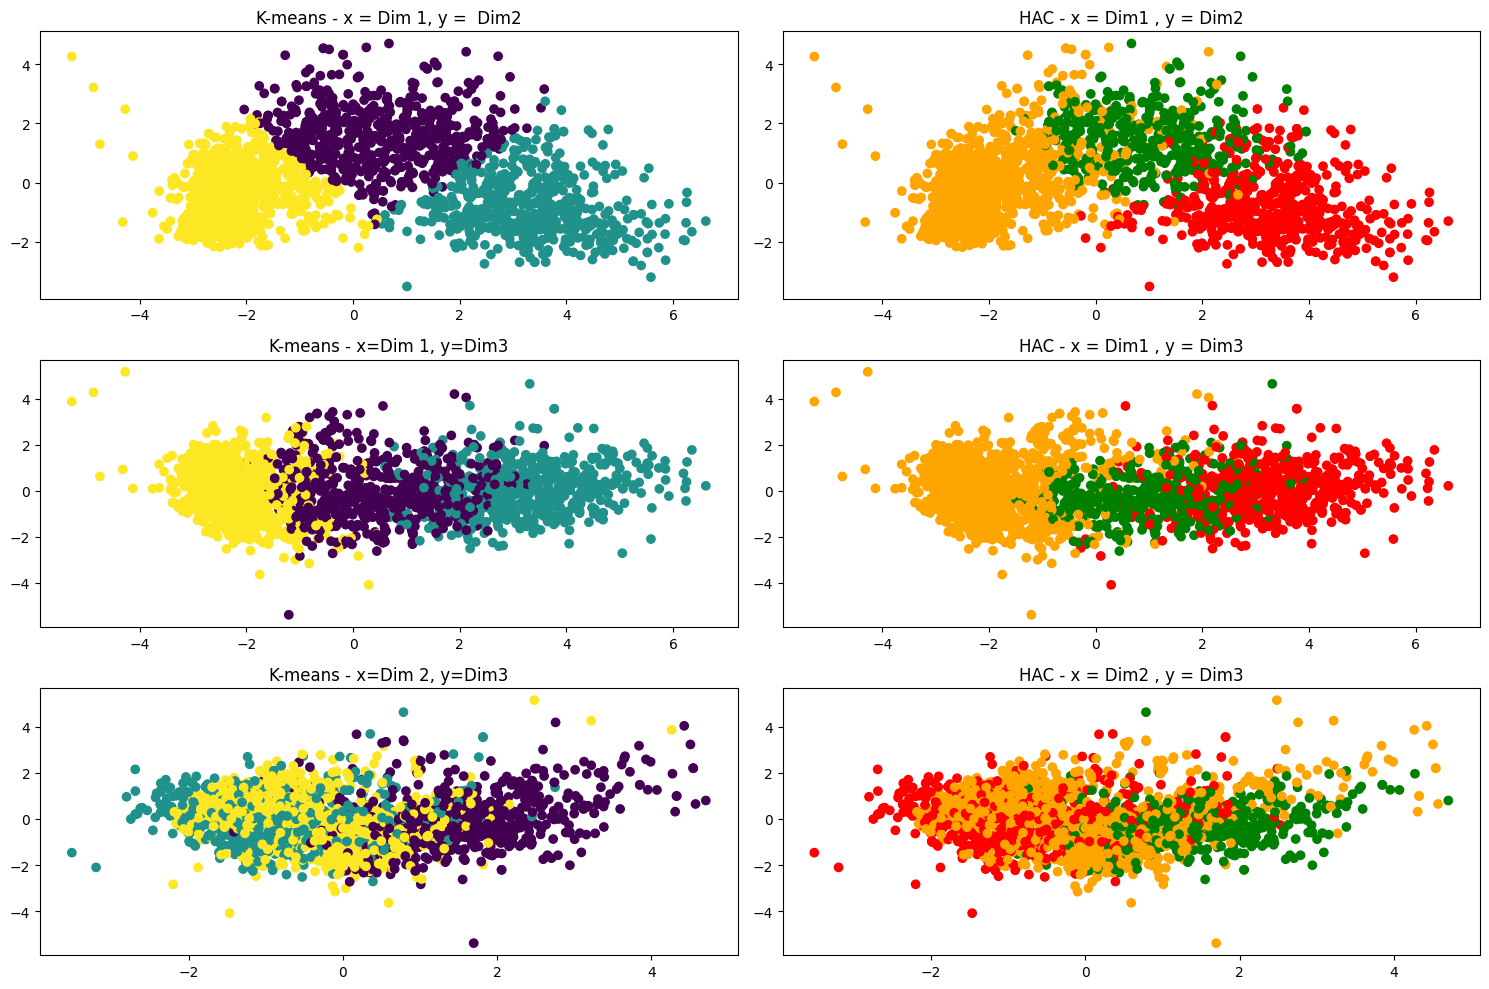

In [63]:
# On va comparer nos classifications

fig, axs = plt.subplots(3, 2, figsize=(15, 10)) 

axs[0,0].scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=clusters_k, cmap='viridis')
axs[0,0].set_title("K-means - x = Dim 1, y =  Dim2")

axs[0,1].scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=[colors[i-1] for i in clusters_h])
axs[0,1].set_title("HAC - x = Dim1 , y = Dim2")

axs[1,0].scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=clusters_k, cmap='viridis')
axs[1,0].set_title("K-means - x=Dim 1, y=Dim3")

axs[1,1].scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=[colors[i-1] for i in clusters_h])
axs[1,1].set_title("HAC - x = Dim1 , y = Dim3")

axs[2,0].scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=clusters_k, cmap='viridis')
axs[2,0].set_title("K-means - x=Dim 2, y=Dim3")

axs[2,1].scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=[colors[i-1] for i in clusters_h])
axs[2,1].set_title("HAC - x = Dim2 , y = Dim3")

plt.tight_layout()
plt.show()